## Importações 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Árvore de Decisão (Decision Tree - DT)
Árvores de decisão são métodos de aprendizado supervisonado utilizado para classificação e regressão. O objetivo é a criação de um modelo que prevê o valor de uma variável de output a partir de regras de decisão simples criadas a partir dos dados de entrada.

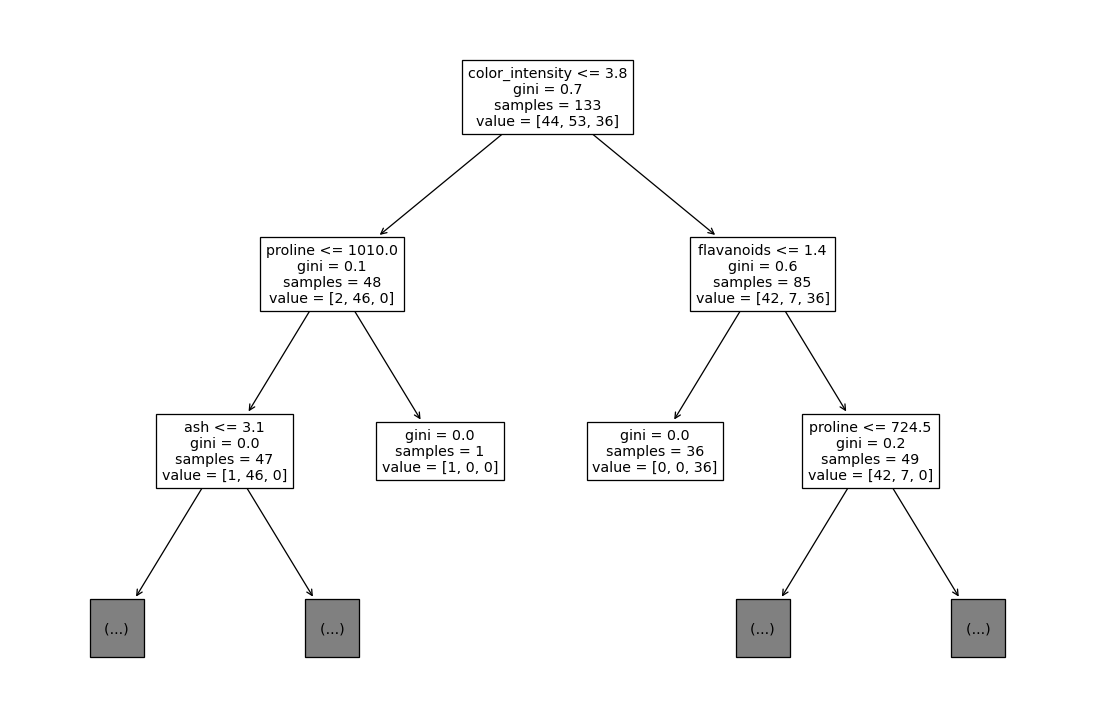

- Os dados utilizados estão na pasta dados contidos no arquivo ```disease.csv```.

In [2]:
df = pd.read_csv("dados/disease.csv")
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [4]:
X = df.drop('Outcome Variable', axis= 1)
Y = df['Outcome Variable']

## Treinando o classificador

In [5]:
# Binarização dos inputs categóricos
onehot = OneHotEncoder(sparse_output= False)
X_bin = onehot.fit_transform(X.select_dtypes(include= ['object']))
X_bin

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [6]:
# Normalização dos inputs numéricos
normalizador = MinMaxScaler()
X_norm = normalizador.fit_transform(X.select_dtypes(exclude= ['object']))
X_norm

array([[0.        ],
       [0.08450704],
       [0.08450704],
       [0.08450704],
       [0.08450704],
       [0.08450704],
       [0.08450704],
       [0.08450704],
       [0.12676056],
       [0.12676056],
       [0.12676056],
       [0.14084507],
       [0.14084507],
       [0.14084507],
       [0.14084507],
       [0.14084507],
       [0.14084507],
       [0.14084507],
       [0.14084507],
       [0.14084507],
       [0.14084507],
       [0.14084507],
       [0.15492958],
       [0.15492958],
       [0.15492958],
       [0.15492958],
       [0.15492958],
       [0.15492958],
       [0.15492958],
       [0.15492958],
       [0.15492958],
       [0.15492958],
       [0.15492958],
       [0.15492958],
       [0.15492958],
       [0.15492958],
       [0.15492958],
       [0.15492958],
       [0.15492958],
       [0.15492958],
       [0.15492958],
       [0.15492958],
       [0.15492958],
       [0.15492958],
       [0.15492958],
       [0.15492958],
       [0.15492958],
       [0.154

In [7]:
# Junção dos inputs
X_all = np.append(X_norm, X_bin, axis= 1)
X_all

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.08450704, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.08450704, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.92957746, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [8]:
# Divisão dos conjuntos de treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y, test_size= 0.25, random_state=42) 

In [9]:
dt = DecisionTreeClassifier(max_depth= 10, max_leaf_nodes=50)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=50)

In [10]:
print(dt.get_n_leaves())
print(dt.get_depth())

50
10


In [11]:
Y_pred = dt.predict(X_test)
Y_pred

array(['Positive', 'Positive', 'Positive', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Positive', 'Positive', 'Negative', 'Negative',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Negati

## Avaliando o classificador

In [12]:
print(confusion_matrix(Y_pred, Y_test))

[[30 13]
 [ 8 37]]


In [13]:
print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

    Negative       0.79      0.70      0.74        43
    Positive       0.74      0.82      0.78        45

    accuracy                           0.76        88
   macro avg       0.76      0.76      0.76        88
weighted avg       0.76      0.76      0.76        88



In [14]:
accuracy_score(Y_test, Y_pred)

0.7613636363636364

## O código abaixo permite a visualização da árvore de decisão gerada.

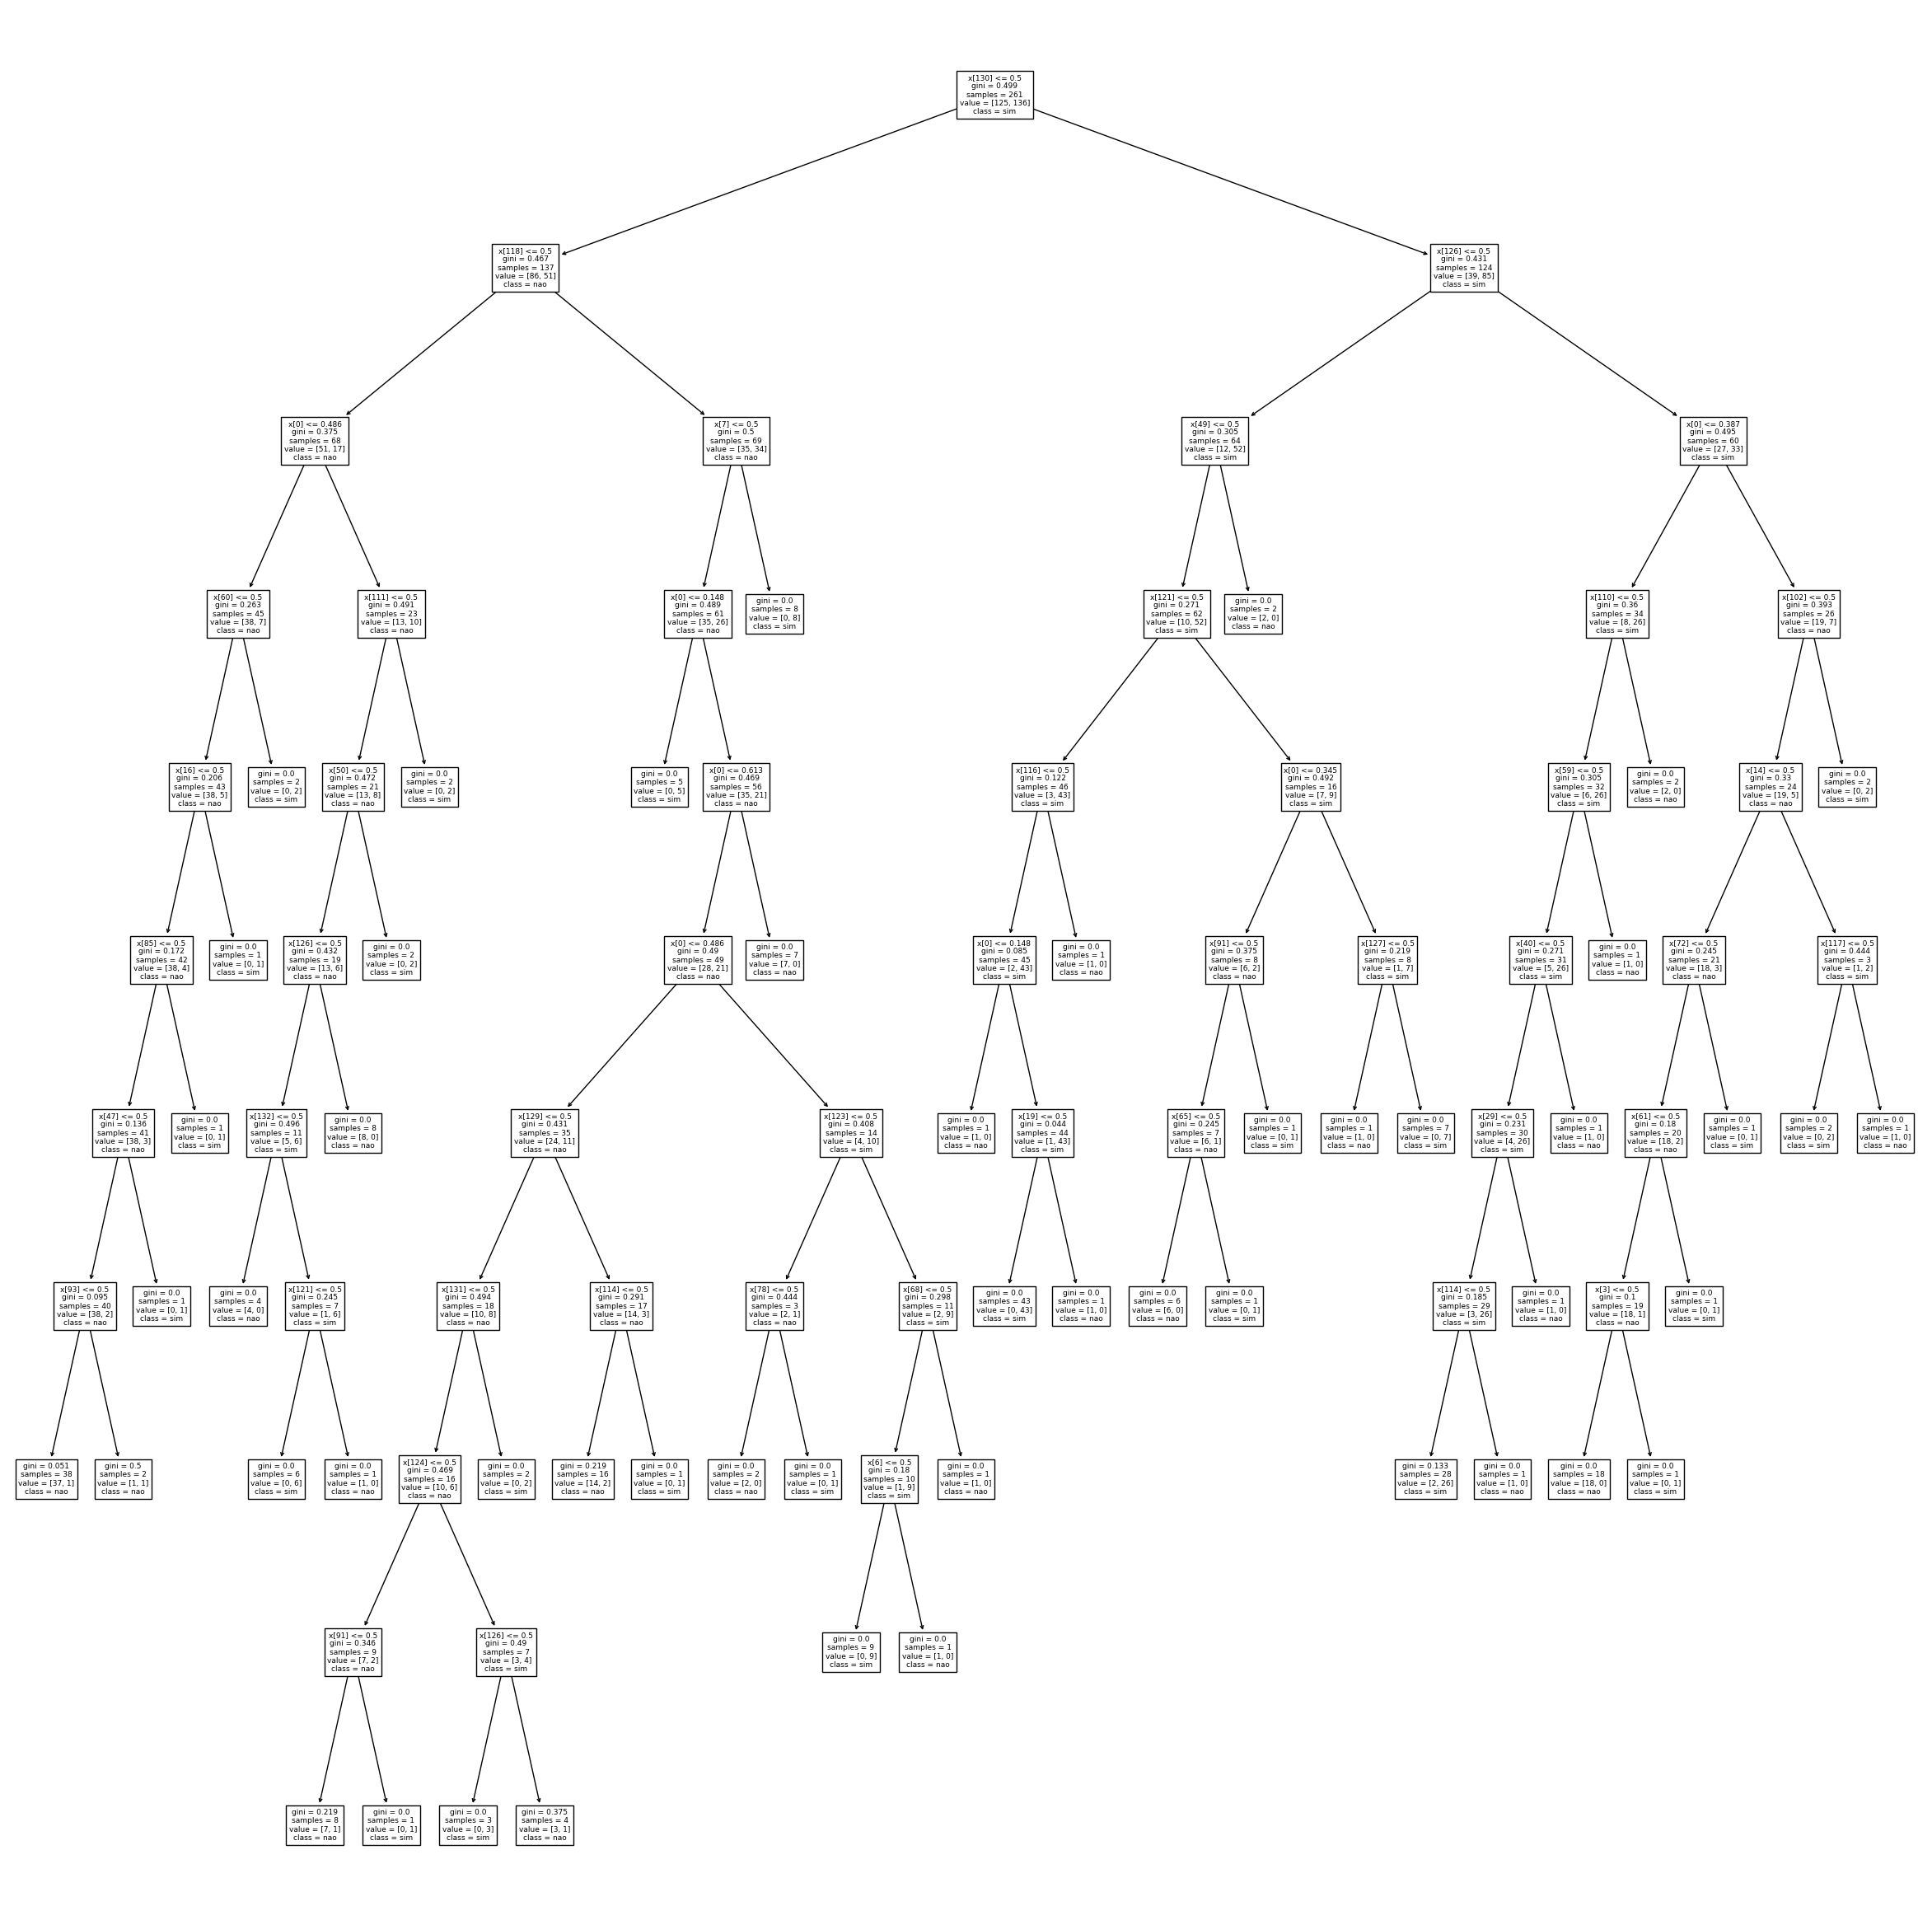

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))
plot_tree(dt, class_names=['nao', 'sim'])
plt.show()